# TensorFlow手習いをJupyter labでする
## 準備
pythonとAnaconda navigatorがインストールされていて、Jupyter labが使える状態からスタート

### TensorFlowをいじるために、専用のpython環境を作る
以下をコマンドラインで実行し、"tensorflow"という名前の(どんな名前でもよいが)python環境を作る。python2.7を使うことにしている。別のpythonバージョンもあり。
その上で、作成した"tensorflow"環境を使いはじめる。

これにより、コマンドラインのプロンプトが"tensorflow"環境であることが以下のように示される。

この新環境にtensorflowパッケージをインストールする。

ここでpythonとコマンドを発行すればtensorflowパッケージのインストールされたpython環境に入れる。
Jupyter labで使うためには、Anaconda navigator から立ち上がるJupyter labが依存しているipythonに、このtensorflowという名前の環境を認識させる。
それには次のようにする。"Python (tensorflow)"と表示される名前を、このtensorflow環境に付与する。
これでAnaconda navigator -> Jupyer lab -> でtensorflow練習用の環境のlabページが立ち上がる。

# tensorflowパッケージを使って回帰をしてみる

## パッケージを読み込む

In [170]:
import tensorflow as tf

In [171]:
# numpyのアレイ形式を使うのはtensorflowの基本なので、それも読み込む
# プロットもしたくなるので、matplotlibのpyplotも読み込む
import numpy as np
from matplotlib import pyplot

## 非線形データを作る

複数の説明変数、１つの被説明変数のデータセットを作る。
以下のようなデータとする。
$$
y = \sum_i w_i \times x_i^{r_i}
$$

In [172]:
n_sample = 1000
n_feature = 5
x = np.random.random(n_sample * n_feature).reshape(n_sample,n_feature)
w = np.random.random(n_feature)
r = np.random.random(n_feature)
y_true = np.zeros(n_sample).reshape(n_sample,1)
for i in np.arange(n_feature):
    y_true[:,0] += x[:,i] ** r[i] * w[i]
    #y_true[:,0] += x[:,i] ** 1 * w[i]

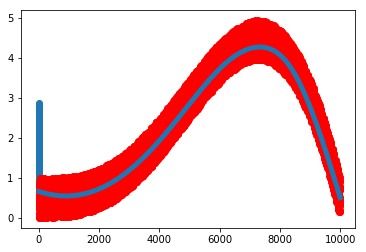

In [173]:
# 第１説明変数と被説明変数との散布図をプロットしてみる
pyplot.scatter(x[:,0],y_true[:,0])
pyplot.show()

## テンソルフローで線形回帰してみる

テンソルフローで、線形モデルを作り、繰り返し計算してモデルの係数を学ばせる。

In [174]:
# モデルを作る。これは線形モデル
linear_model = tf.layers.Dense(units=1)
# 説明変数データxを取って、そのデータの構造に合致したテンソルを作り
# それを線形変換してy_predを作る、というルールを定めている
# y_predもテンソル
y_pred = linear_model(tf.identity(x))
# y_trueは１列の行列。それと同じ形の「入力受付状態のテンソル」を作る
y_pl = tf.placeholder(tf.float64,y_true.shape)
# 入力受付状態のy_plには被説明変数データを投入するつもりだが
# それと予測値 y_predとの二乗誤差の平均値を「残差」とする、という式
# loss もテンソル
loss = tf.losses.mean_squared_error(labels=y_pl, predictions=y_pred)
# 最適化方法・関数の設定
optimizer = tf.train.GradientDescentOptimizer(0.1)
# lossを最小化することを「トレーニングと定義する」というトレーニングの設定
train = optimizer.minimize(loss)
# tensorfolowセッションオブジェクトの発生と初期化
sess = tf.Session()
init = tf.global_variables_initializer()


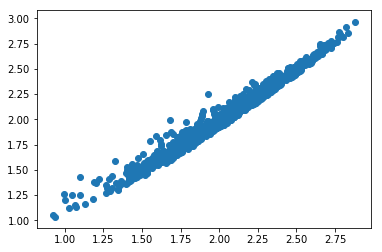

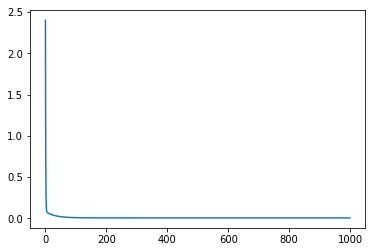

0.0031324829906225204


In [175]:
sess.run(init)
# loss値の推移を保管する
lossval = np.zeros(1000)
for i in range(1000):
    # 毎回y_plにy_trueを代入しつつ、trainしつつlossを計算する
    # trainの計算値は捨て、lossの計算値を取り出す
  _, loss_value = sess.run((train, loss),feed_dict={y_pl:y_true})
  #print(loss_value)
  lossval[i] = loss_value

# トレーニングが終わった状態で、y_predを計算すると、それが最終の予測値
y_predout = sess.run(y_pred)
pyplot.scatter(y_true[:,0],y_predout[:,0])
pyplot.show()
pyplot.plot(lossval)
pyplot.show()
print(lossval[999])